In [1]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

# Reading Data

In [2]:
data = torch.load('./Data/Features/hog_features.pt')
for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 256) (55000,)
Val Data (X, y):  (5000, 256) (5000,)
Test Data (X, y):  (10000, 256) (10000,)


# Data Transformation

## PCA

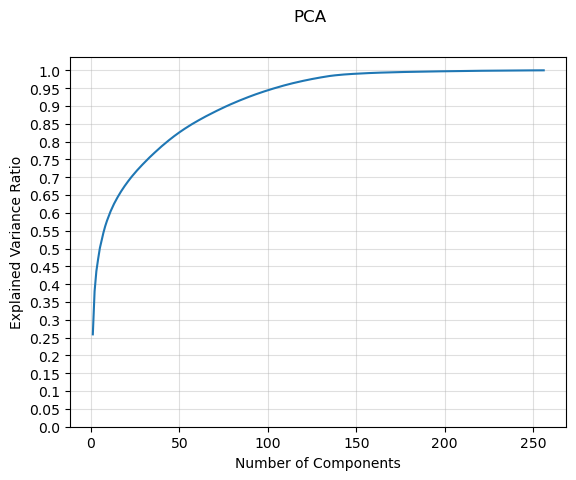

The least number of features to reach 95% variance:  104


In [3]:
pca = PCA()
pca.fit(data['train'][0])
explained_variance_ratios = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratios)+1), explained_variance_ratios)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.suptitle('PCA')
plt.yticks(np.array(range(0, 105, 5))/100, np.array(range(0, 105, 5))/100)
plt.xticks(range(0, len(explained_variance_ratios)+1, 50), range(0, len(explained_variance_ratios)+1, 50))
plt.grid(True, alpha=0.4)
plt.show()

for i in range(len(explained_variance_ratios)):
    if(explained_variance_ratios[i] > 0.95):
        print("The least number of features to reach 95% variance: ", i+1)
        break

Based on this plot we can see that with 104 components we are able to explain about 95% of our variance.  
So, we will transform our data using n_components = 104

In [4]:
pca = PCA(n_components=104)
data['train'][0] = pca.fit_transform(data['train'][0])
data['val'][0] = pca.transform(data['val'][0])
data['test'][0] = pca.transform(data['test'][0])

for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 104) (55000,)
Val Data (X, y):  (5000, 104) (5000,)
Test Data (X, y):  (10000, 104) (10000,)


## Normalization

In [5]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler().fit(data['train'][0])
data['train'][0] = normalizer.transform(data['train'][0])
data['val'][0] = normalizer.transform(data['val'][0])
data['test'][0] = normalizer.transform(data['test'][0])

## ANOVA Test

In [6]:
# from sklearn.feature_selection import SelectPercentile, f_classif

# top_features = SelectPercentile(f_classif, percentile=90).fit_transform(*data['train'])
# top_features.shape

# EDA

In [7]:
# TODO
# Plot examples of each class

In [8]:
X_df = pd.DataFrame(data['train'][0])
y_df = pd.DataFrame(data['train'][1])

X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
count,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,...,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04
mean,-7.629395e-09,9.848855e-09,-5.513972e-09,-1.803311e-09,2.219460e-09,-1.165217e-08,-1.456521e-09,1.064647e-08,7.386641e-09,1.449585e-08,...,8.739125e-09,8.669767e-10,2.080744e-09,-1.158281e-08,5.548650e-10,5.548650e-10,4.022771e-09,-8.773804e-09,5.826083e-09,-2.774325e-10
std,1.000005e+00,1.000007e+00,1.000004e+00,1.000007e+00,1.000006e+00,1.000005e+00,1.000004e+00,1.000005e+00,1.000008e+00,1.000006e+00,...,1.000005e+00,1.000004e+00,1.000006e+00,1.000005e+00,1.000005e+00,1.000006e+00,1.000008e+00,1.000008e+00,1.000006e+00,1.000004e+00
min,-1.373900e+00,-2.110867e+00,-2.751278e+00,-3.413025e+00,-2.656147e+00,-3.550791e+00,-3.943779e+00,-3.806832e+00,-3.483114e+00,-3.985815e+00,...,-5.477138e+00,-5.550145e+00,-4.805815e+00,-5.152078e+00,-5.706116e+00,-5.648594e+00,-5.148607e+00,-5.211448e+00,-5.169731e+00,-5.049346e+00
25%,-8.740639e-01,-8.017600e-01,-7.335088e-01,-6.576952e-01,-7.253747e-01,-6.264655e-01,-5.755760e-01,-6.856896e-01,-6.934962e-01,-6.605678e-01,...,-6.005484e-01,-5.713883e-01,-6.275534e-01,-5.925624e-01,-4.969016e-01,-5.835598e-01,-6.000037e-01,-6.223902e-01,-6.328567e-01,-5.981800e-01
50%,-3.921410e-01,-1.145819e-01,-4.726223e-02,-8.119787e-02,-5.569226e-02,-3.060048e-02,4.951421e-02,-4.910615e-02,-4.916545e-02,-2.501414e-02,...,1.068501e-02,-5.315416e-03,6.743196e-03,-1.797299e-02,2.305803e-02,-1.494594e-02,-9.939369e-03,1.086713e-02,1.230356e-02,-8.934093e-03
75%,8.610998e-01,6.739319e-01,5.397300e-01,5.454837e-01,6.660431e-01,5.486112e-01,6.551283e-01,6.082855e-01,6.093863e-01,6.209965e-01,...,5.932082e-01,5.810756e-01,6.318154e-01,5.889889e-01,5.506359e-01,5.757966e-01,5.969044e-01,6.397509e-01,6.252199e-01,5.751923e-01
max,2.070450e+00,2.327121e+00,3.257775e+00,4.513450e+00,3.991083e+00,4.138202e+00,3.945785e+00,4.482721e+00,4.381152e+00,4.501276e+00,...,6.525352e+00,5.599861e+00,5.017688e+00,5.615522e+00,5.948337e+00,6.479425e+00,5.430910e+00,5.727578e+00,5.669696e+00,6.194753e+00


As we can see, our columns are 0 mean and have a standard deviation of 1.

# Models

## Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(*data['train'])

train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      5490
           1       0.95      0.89      0.91      5498
           2       0.65      0.60      0.62      5515
           3       0.71      0.75      0.73      5536
           4       0.64      0.71      0.67      5496
           5       0.81      0.82      0.81      5518
           6       0.45      0.37      0.40      5518
           7       0.78      0.86      0.82      5472
           8       0.88      0.92      0.90      5462
           9       0.93      0.86      0.89      5495

    accuracy                           0.75     55000
   macro avg       0.75      0.75      0.75     55000
weighted avg       0.75      0.75      0.75     55000



In [10]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       510
           1       0.96      0.91      0.94       502
           2       0.65      0.61      0.63       485
           3       0.71      0.79      0.75       464
           4       0.65      0.67      0.66       504
           5       0.78      0.80      0.79       482
           6       0.44      0.37      0.40       482
           7       0.78      0.87      0.82       528
           8       0.90      0.92      0.91       538
           9       0.92      0.83      0.87       505

    accuracy                           0.76      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.76      0.75      5000



In [11]:
print('Test Metrics')
print(classification_report(data['test'][1], test_preds))

Test Metrics
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.95      0.89      0.91      1000
           2       0.64      0.58      0.61      1000
           3       0.72      0.74      0.73      1000
           4       0.64      0.70      0.67      1000
           5       0.81      0.82      0.82      1000
           6       0.42      0.37      0.40      1000
           7       0.78      0.86      0.82      1000
           8       0.88      0.93      0.90      1000
           9       0.94      0.86      0.90      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



## Nearest Neighbour

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:26<00:00,  1.11it/s]


The best k is :  5


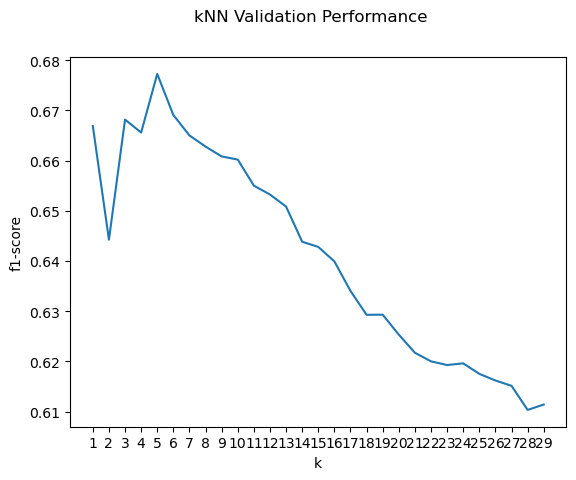

In [12]:
f1_scores = []
for k in tqdm(range(1, 30)):
    clf = KNeighborsClassifier(k).fit(*data['train'])
    score = f1_score(data['val'][1], clf.predict(data['val'][0]), average='macro')
    f1_scores.append(score)

print("The best k is : ", np.argmax(f1_scores)+1)
plt.plot(range(1, 30), f1_scores)
plt.xticks(range(1, 30), range(1, 30))
plt.xlabel('k')
plt.ylabel('f1-score')
plt.suptitle('kNN Validation Performance')
plt.show()


As we can see, we acheived the best validation f1 score with k=5

In [13]:
best_k = 5
clf = KNeighborsClassifier(n_neighbors=best_k).fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      5490
           1       0.49      0.99      0.66      5498
           2       0.76      0.70      0.73      5515
           3       0.88      0.72      0.79      5536
           4       0.73      0.71      0.72      5496
           5       0.97      0.68      0.80      5518
           6       0.73      0.45      0.56      5518
           7       0.71      0.95      0.81      5472
           8       0.99      0.75      0.85      5462
           9       0.92      0.93      0.93      5495

    accuracy                           0.76     55000
   macro avg       0.80      0.76      0.76     55000
weighted avg       0.80      0.76      0.76     55000



In [14]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       510
           1       0.44      0.98      0.61       502
           2       0.66      0.59      0.62       485
           3       0.87      0.68      0.77       464
           4       0.63      0.60      0.61       504
           5       0.90      0.54      0.67       482
           6       0.52      0.31      0.39       482
           7       0.62      0.91      0.74       528
           8       1.00      0.64      0.78       538
           9       0.89      0.87      0.88       505

    accuracy                           0.68      5000
   macro avg       0.73      0.68      0.68      5000
weighted avg       0.73      0.68      0.68      5000



In [15]:
print('Test Metrics')
print(classification_report(data['test'][1], test_preds))

Test Metrics
              precision    recall  f1-score   support

           0       0.79      0.62      0.70      1000
           1       0.43      0.97      0.59      1000
           2       0.61      0.52      0.56      1000
           3       0.82      0.62      0.71      1000
           4       0.61      0.58      0.60      1000
           5       0.94      0.57      0.71      1000
           6       0.49      0.31      0.38      1000
           7       0.64      0.93      0.76      1000
           8       0.98      0.66      0.79      1000
           9       0.90      0.91      0.91      1000

    accuracy                           0.67     10000
   macro avg       0.72      0.67      0.67     10000
weighted avg       0.72      0.67      0.67     10000



## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5490
           1       1.00      1.00      1.00      5498
           2       1.00      1.00      1.00      5515
           3       1.00      1.00      1.00      5536
           4       1.00      1.00      1.00      5496
           5       1.00      1.00      1.00      5518
           6       1.00      1.00      1.00      5518
           7       1.00      1.00      1.00      5472
           8       1.00      1.00      1.00      5462
           9       1.00      1.00      1.00      5495

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000



In [18]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       510
           1       0.91      0.91      0.91       502
           2       0.53      0.54      0.53       485
           3       0.66      0.70      0.68       464
           4       0.54      0.52      0.53       504
           5       0.77      0.80      0.79       482
           6       0.36      0.37      0.36       482
           7       0.80      0.80      0.80       528
           8       0.88      0.86      0.87       538
           9       0.89      0.86      0.88       505

    accuracy                           0.70      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.71      0.70      0.70      5000



In [19]:
print('Test Metrics')
print(classification_report(data['test'][1], test_preds))

Test Metrics
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1000
           1       0.91      0.89      0.90      1000
           2       0.49      0.50      0.49      1000
           3       0.69      0.68      0.69      1000
           4       0.54      0.54      0.54      1000
           5       0.80      0.80      0.80      1000
           6       0.37      0.39      0.38      1000
           7       0.79      0.78      0.78      1000
           8       0.87      0.86      0.86      1000
           9       0.88      0.88      0.88      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000



## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5490
           1       1.00      1.00      1.00      5498
           2       1.00      1.00      1.00      5515
           3       1.00      1.00      1.00      5536
           4       1.00      1.00      1.00      5496
           5       1.00      1.00      1.00      5518
           6       1.00      1.00      1.00      5518
           7       1.00      1.00      1.00      5472
           8       1.00      1.00      1.00      5462
           9       1.00      1.00      1.00      5495

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000



In [21]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       510
           1       0.98      0.95      0.97       502
           2       0.72      0.71      0.71       485
           3       0.79      0.84      0.82       464
           4       0.68      0.71      0.69       504
           5       0.85      0.89      0.87       482
           6       0.53      0.45      0.49       482
           7       0.86      0.88      0.87       528
           8       0.93      0.92      0.92       538
           9       0.93      0.91      0.92       505

    accuracy                           0.81      5000
   macro avg       0.80      0.81      0.80      5000
weighted avg       0.80      0.81      0.81      5000



In [22]:
print('Test Metrics')
print(classification_report(data['test'][1], test_preds))

Test Metrics
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1000
           1       0.97      0.92      0.95      1000
           2       0.67      0.67      0.67      1000
           3       0.79      0.82      0.80      1000
           4       0.69      0.72      0.70      1000
           5       0.88      0.91      0.89      1000
           6       0.55      0.49      0.52      1000
           7       0.87      0.87      0.87      1000
           8       0.92      0.94      0.93      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000).fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      5490
           1       0.96      0.96      0.96      5498
           2       0.70      0.69      0.69      5515
           3       0.83      0.86      0.84      5536
           4       0.69      0.74      0.71      5496
           5       0.93      0.91      0.92      5518
           6       0.56      0.50      0.53      5518
           7       0.89      0.92      0.90      5472
           8       0.96      0.95      0.95      5462
           9       0.95      0.94      0.95      5495

    accuracy                           0.83     55000
   macro avg       0.83      0.83      0.83     55000
weighted avg       0.82      0.83      0.83     55000



In [24]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       510
           1       0.95      0.97      0.96       502
           2       0.69      0.69      0.69       485
           3       0.83      0.86      0.84       464
           4       0.73      0.74      0.73       504
           5       0.91      0.92      0.92       482
           6       0.55      0.50      0.52       482
           7       0.90      0.93      0.91       528
           8       0.94      0.93      0.94       538
           9       0.95      0.91      0.93       505

    accuracy                           0.83      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.83      0.82      5000



In [25]:
print('Test Metrics')
print(classification_report(data['test'][1], test_preds))

Test Metrics
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.96      0.95      0.96      1000
           2       0.70      0.69      0.69      1000
           3       0.82      0.84      0.83      1000
           4       0.69      0.72      0.71      1000
           5       0.91      0.92      0.92      1000
           6       0.53      0.51      0.52      1000
           7       0.89      0.90      0.89      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



## SVM

In [26]:
from sklearn.svm import SVC

clf = SVC().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])
test_preds = clf.predict(data['test'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5490
           1       0.99      0.98      0.99      5498
           2       0.89      0.87      0.88      5515
           3       0.93      0.96      0.94      5536
           4       0.86      0.89      0.88      5496
           5       0.99      0.97      0.98      5518
           6       0.85      0.83      0.84      5518
           7       0.95      0.98      0.97      5472
           8       1.00      0.99      1.00      5462
           9       0.98      0.98      0.98      5495

    accuracy                           0.94     55000
   macro avg       0.94      0.94      0.94     55000
weighted avg       0.94      0.94      0.94     55000



In [27]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       510
           1       0.99      0.97      0.98       502
           2       0.76      0.75      0.75       485
           3       0.86      0.89      0.88       464
           4       0.75      0.74      0.75       504
           5       0.91      0.93      0.92       482
           6       0.60      0.59      0.59       482
           7       0.90      0.93      0.91       528
           8       0.97      0.96      0.97       538
           9       0.95      0.92      0.94       505

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [28]:
print('Test Metrics')
print(classification_report(data['test'][1], test_preds))

Test Metrics
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.73      0.74      1000
           3       0.85      0.86      0.85      1000
           4       0.74      0.74      0.74      1000
           5       0.93      0.94      0.93      1000
           6       0.60      0.58      0.59      1000
           7       0.91      0.92      0.91      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Feed Forward Network

In [32]:
from torch.utils.data import Dataset, DataLoader

class fmnist_hog_features_dataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data[1])
    
    def __getitem__(self, index):
        X = self.data[0][index]
        y = torch.zeros(size =(10,))
        y[int(self.data[1][index])] = 1
        return torch.tensor(X), y
        
train_loader = DataLoader(fmnist_hog_features_dataset(data['train']), batch_size= 512, num_workers=10)
val_loader = DataLoader(fmnist_hog_features_dataset(data['val']), batch_size= 512, num_workers=10)
test_loader = DataLoader(fmnist_hog_features_dataset(data['test']), batch_size= 512, num_workers=10)

In [33]:
from torch import nn

class FeedForwardNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU()
        )
        self.classification_head = nn.Sequential(
            nn.Linear(64, 10),
            nn.Softmax(dim=-1)
        )

    def forward(self, X):
        outs = self.linear(X)
        outs = self.classification_head(outs)
        return outs
    
device = ("cuda" if torch.cuda.is_available() else "cpu")

model = FeedForwardNetwork(250).to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters())

num_epochs = 30

FeedForwardNetwork(
  (linear): Sequential(
    (0): Linear(in_features=250, out_features=64, bias=True)
    (1): ReLU()
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
    (1): Softmax(dim=-1)
  )
)


In [31]:
train_loss = []
train_f1_score = []

val_loss = []
val_f1_score = []

print('Training:')
for epoch in tqdm(range(0, num_epochs)):
    running_preds = []
    running_labels = []
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        with torch.no_grad():
            running_preds.append(pred)
            running_labels.append(y)

    preds, labels = torch.vstack(running_preds), torch.vstack(running_labels)
    train_loss.append(loss_fn(preds, labels).item())
    train_f1_score.append(f1_score(labels.argmax(-1).cpu(), preds.argmax(-1).cpu(), average='macro'))

    with torch.no_grad():
        running_preds = []
        running_labels = []
        for batch, (X,y) in enumerate(val_loader):
            X, y = X.to(device), y.to(device)

            pred = model(X)

            running_preds.append(pred)
            running_labels.append(y)

        preds, labels = torch.vstack(running_preds), torch.vstack(running_labels)
        val_loss.append(loss_fn(preds, labels).item())   
        val_f1_score.append(f1_score(labels.argmax(-1).cpu(), preds.argmax(-1).cpu(), average='macro'))


Training:


  0%|          | 0/30 [00:00<?, ?it/s]Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/jianwendong/anaconda3/envs/py3.8/lib/python3.8/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/jianwendong/anaconda3/envs/py3.8/lib/python3.8/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'fmnist_vit_features_dataset' on <module '__main__' (built-in)>
  0%|          | 0/30 [02:44<?, ?it/s]


KeyboardInterrupt: 

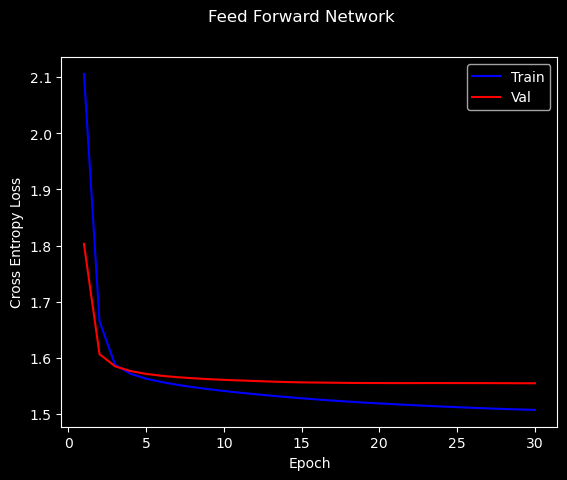

In [47]:
plt.plot(range(1, len(train_loss)+1), train_loss, label = 'Train', c='blue')
plt.plot(range(1, len(val_loss)+1), val_loss, label = 'Val', c='red')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.suptitle('Feed Forward Network')
plt.legend()
plt.show()

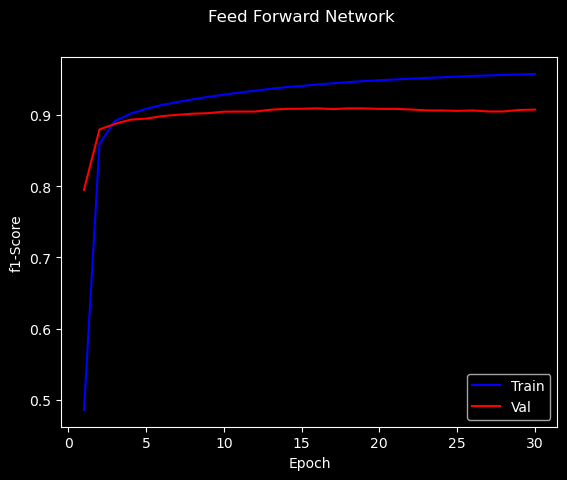

In [48]:
plt.plot(range(1, len(train_f1_score)+1), train_f1_score, label = 'Train', c='blue')
plt.plot(range(1, len(val_f1_score)+1), val_f1_score, label = 'Val', c='red')
plt.xlabel('Epoch')
plt.ylabel('f1-Score')
plt.suptitle('Feed Forward Network')
plt.legend()
plt.show()

In [53]:
model.cpu()
with torch.no_grad():
    print('Train Metrics')
    print(classification_report(model(torch.tensor(data['train'][0])).argmax(-1), data['train'][1]))

Train Metrics
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5501
           1       0.99      0.99      0.99      5494
           2       0.93      0.94      0.93      5435
           3       0.96      0.94      0.95      5625
           4       0.94      0.93      0.93      5608
           5       0.99      0.99      0.99      5476
           6       0.87      0.90      0.89      5321
           7       0.99      0.97      0.98      5575
           8       1.00      1.00      1.00      5507
           9       0.98      0.99      0.98      5458

    accuracy                           0.96     55000
   macro avg       0.96      0.96      0.96     55000
weighted avg       0.96      0.96      0.96     55000



In [52]:
with torch.no_grad():
    print('Val Metrics')
    print(classification_report(model(torch.tensor(data['val'][0])).argmax(-1), data['val'][1]))

Val Metrics
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       508
           1       0.98      0.99      0.99       496
           2       0.84      0.87      0.85       483
           3       0.92      0.91      0.92       507
           4       0.88      0.82      0.85       541
           5       0.97      0.98      0.97       496
           6       0.71      0.78      0.74       459
           7       0.96      0.94      0.95       511
           8       0.98      0.98      0.98       501
           9       0.95      0.95      0.95       498

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



## Transformer